In [87]:
import subprocess

### Setup Parameters 

In [88]:
f_start = 500 #GHz
f_stop  = 2000 #GHz

f_step  = 0.01 #GHz  

h2o_scale_factor = 1.0


profile_folder = "../profiles/"
profiles = ['Antarctic_DJF_34km', 'Antarctic_DJF_36km', 'Antarctic_DJF_38km',]

zenith_angle = [30,45,60]

### Run am and Save outputs

In [89]:
for profile in profiles:
    for angle in zenith_angle:
        cmd = ['am',  profile_folder+profile+'.amc', '%1d'%f_start, 'GHz', '%1d'%f_stop, 'GHz', \
               '%1.3f'%f_step, 'GHz', '%1d'%angle, 'deg', '%1.2f'%h2o_scale_factor]

        f = open("../models/"+profile+'_%1d'%angle+'deg'+'_%1.1f'%h2o_scale_factor+".out", "wb")
        f.write(("# %s  zenith_angle %d\n"%(profile,angle)).encode())
        f.write(b"# f [GHz] tx Tb [K] Trj [K] I [watt*m-2*Hz-1*sr-1]\n")
        f.write(subprocess.run(cmd, capture_output=True).stdout)
        f.close()

### Ploting the radiance and transmission to check the data

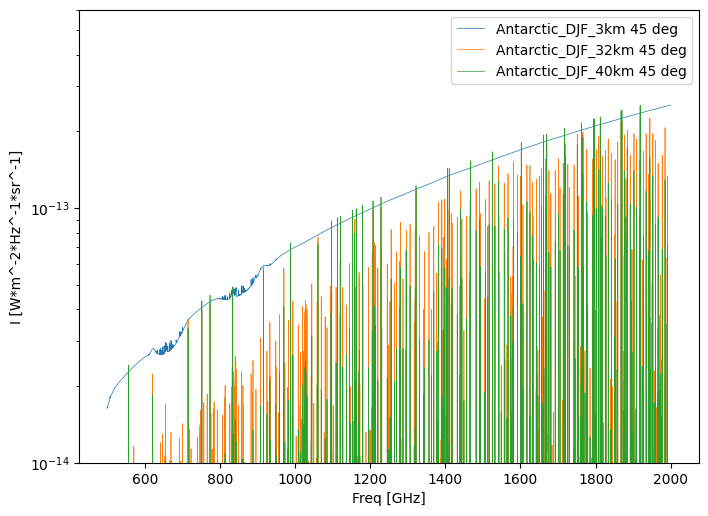

In [91]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6), dpi=100)



for profile in ['Antarctic_DJF_3km', 'Antarctic_DJF_32km', 'Antarctic_DJF_40km',]:
    for angle in [45]:
        atmo = np.loadtxt("../models/"+profile+'_%1d'%angle+'deg'+'_%1.1f'%h2o_scale_factor+".out",\
                          skiprows=2)

        plt.plot(atmo[:,0],atmo[:,4], lw=0.5, label='%s %d deg'%(profile,angle))


plt.yscale('log')
plt.ylim([1e-14,6e-13])

plt.xlabel('Freq [GHz]')
plt.ylabel('I [W*m^-2*Hz^-1*sr^-1]')

plt.legend()

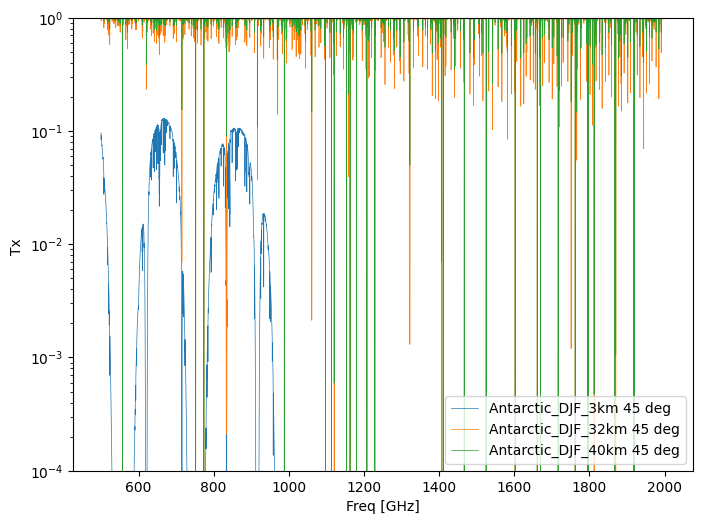

In [92]:
plt.figure(figsize=(8,6), dpi=100)

for profile in ['Antarctic_DJF_3km', 'Antarctic_DJF_32km', 'Antarctic_DJF_40km',]:
    for angle in [45]:
        atmo = np.loadtxt("../models/"+profile+'_%1d'%angle+'deg'+'_%1.1f'%h2o_scale_factor+".out",\
                          skiprows=2)

        plt.plot(atmo[:,0],atmo[:,1], lw=0.5, label='%s %d deg'%(profile,angle))


plt.yscale('log')
plt.ylim([1e-4,1])


plt.xlabel('Freq [GHz]')
plt.ylabel('Tx ')

plt.legend()